# T2-1. 타이타닉(Titanic) Simple Baseline



In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("titanic.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.


In [3]:
## 라이브러리 불러오기
import pandas as pd 


In [4]:
# 데이터 불러오기 
X_train.shape, y_train.shape, X_test.shape

((712, 11), (712, 2), (179, 11))

EDA

In [5]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [8]:
y_train.head()

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0


In [9]:
# 생존 비율 
y_train['Survived'].value_counts()

Survived
0    441
1    271
Name: count, dtype: int64

## 데이터 전처리

In [13]:
y=y_train["Survived"]
features = ["Pclass","Sex","SibSp","Parch"]

X=pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])


In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,max_depth=7, random_state=2021)
model.fit(X,y)
predictions = model.predict(test)


In [16]:
model.score(X,y)

0.8356741573033708

# T2-2. Pima Indians Diabetes(피마 인디언 당뇨병)




In [23]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("diabetes.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

- 이상치 처리 (Glucose, BloodPressure, SkinThickness, Insulin, BMI가 0인 값)


In [24]:
X_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30


In [25]:
y_train['Outcome'].value_counts()

Outcome
0    403
1    211
Name: count, dtype: int64

In [26]:
X_train.info() ## 결측치 없음

X_test.isnull().sum() ## 결측치 없음

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

- 이상치 처리 (Glucose, BloodPressure, SkinThickness, Insulin, BMI가 0인 값)


In [27]:
## 이상치 처리  Train
out_glu = X_train[X_train['Glucose']==0]
print("Glucose : ",len(out_glu))

out_blood = X_train[X_train['BloodPressure']==0]
print("BloodPressure : ",len(out_blood))

out_skin = X_train[X_train['SkinThickness']==0]
print("SkinThickness : ",len(out_skin))

out_insul = X_train[X_train['Insulin']==0]
print("Insulin : ",len(out_insul))

out_bmi = X_train[X_train['BMI']==0]
print("BMI : ",len(out_bmi))



Glucose :  5
BloodPressure :  31
SkinThickness :  175
Insulin :  287
BMI :  9


In [28]:
## 이상치 처리  test
out_glu = X_test[X_test['Glucose']==0]
print("Glucose : ",len(out_glu))

out_blood = X_test[X_test['BloodPressure']==0]
print("BloodPressure : ",len(out_blood))

out_skin = X_test[X_test['SkinThickness']==0]
print("SkinThickness : ",len(out_skin))

out_insul = X_test[X_test['Insulin']==0]
print("Insulin : ",len(out_insul))

out_bmi = X_test[X_test['BMI']==0]
print("BMI : ",len(out_bmi))

Glucose :  0
BloodPressure :  4
SkinThickness :  52
Insulin :  87
BMI :  2


In [29]:
## 포도당은 트레인에만 0이 존재함 -> 그냥 삭제 

print("Glucose 이상치 삭제 전 :", X_train.shape,y_train.shape)
del_idx= X_train[(X_train['Glucose']==0)].index
X_train = X_train.drop(index=del_idx,axis=0)
y_train = y_train.drop(index=del_idx,axis=0)
# X_train=X_train[X_train['Glucose']!=0]
print("Glucose 이상치 삭제 후 :", X_train.shape,y_train.shape)




Glucose 이상치 삭제 전 : (614, 9) (614, 2)
Glucose 이상치 삭제 후 : (609, 9) (609, 2)


In [30]:
## 포도당을 제외한 이상치는 평균값으로 대체 

# BloodPressure
cols=['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
blood_mean=X_train['BloodPressure'].mean()
SkinThickness_mean = X_train['SkinThickness'].mean()
Insulin_mean = X_train['Insulin'].mean()
BMI_mean = X_train['BMI'].mean()

X_train.loc[X_train['BloodPressure']==0,'BloodPressure']=blood_mean
X_train.loc[X_train['SkinThickness']==0,"SkinThickness"]=SkinThickness_mean
X_train.loc[X_train['Insulin']==0,"Insulin"]=Insulin_mean
X_train.loc[X_train['BMI']==0,"BMI"]=BMI_mean






In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        609 non-null    int64  
 1   Pregnancies               609 non-null    int64  
 2   Glucose                   609 non-null    int64  
 3   BloodPressure             609 non-null    float64
 4   SkinThickness             609 non-null    float64
 5   Insulin                   609 non-null    float64
 6   BMI                       609 non-null    float64
 7   DiabetesPedigreeFunction  609 non-null    float64
 8   Age                       609 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 47.6 KB


In [32]:
## 스케일링
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
cols= ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
X_train.loc[:,cols] = scaler.fit_transform(X_train[cols])
X_test.loc[:,cols] = scaler.fit_transform(X_test[cols])


In [33]:
## id 제거
X_train = X_train.drop(['id'],axis=1)


In [34]:
X_test=X_test.drop(['id'],axis=1)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
258,-0.864136,2.253680,-1.225440,-0.174928,2.785427,-0.741639,0.698501,-0.811248
220,-1.167964,1.748304,-0.652700,0.649085,3.726419,0.287728,2.116389,-1.083828
438,-0.864136,-0.778574,-0.079960,-0.238313,-0.640518,-1.652687,-1.028807,-1.083828
130,0.047350,1.621960,-0.079960,-0.301699,0.894305,-0.292030,-0.301162,0.006490
730,-0.256479,0.263763,0.378231,0.268771,0.081214,-0.445844,-0.430370,0.097350
...,...,...,...,...,...,...,...,...
678,-0.256479,-0.020510,-1.110892,-1.189097,-0.640518,0.453373,-1.096811,-0.720389
500,-0.560307,-0.146854,1.065519,0.015229,0.008127,-0.824461,-0.464372,-1.083828
256,-0.256479,-0.336370,-0.881796,1.282940,-0.640518,-0.244703,0.365280,-0.266089
80,-0.256479,-0.273198,-1.569083,-0.365084,-0.640518,-1.155751,-1.052608,-0.992968


In [35]:
from sklearn.svm import SVC
model = SVC(random_state = 2022)
model.fit(X_train,y_train['Outcome'])
predictions = model.predict(X_test)


In [36]:
model.score(X_train,y_train['Outcome'])

0.8292282430213465

# T2-3. Adult Census Income Tutorial

In [21]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("adult.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='income', null_name='?')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 15), (6513, 15), (26048, 2), (6513, 2))

In [22]:
## 데이터 확인
X_train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
7632,7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
27878,27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States
14121,14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States
32345,32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [23]:
## 타겟 수 확인
y_train['income'].value_counts()

income
<=50K    19756
>50K      6292
Name: count, dtype: int64

In [24]:
## 데이터 타입 확인
### X_train.info()

In [25]:
## 피처구분

numeric_features=['age','fnlwgt','education.num',
                    'capital.gain','capital.loss',
                    'hours.per.week']

category_features = ['workclass','education','marital.status',
                        'occupation','relationship','race','sex','native.country']


In [26]:
X_train[numeric_features].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.610335,1.895741e+05,10.082118,1081.193796,88.477695,40.420224
std,13.628346,1.043848e+05,2.574608,7404.962675,404.689981,12.354707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182472e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365968e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
X_train.isnull().sum()

id                   0
age                  0
workclass         1456
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1463
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     461
dtype: int64

In [28]:
X_test.isnull().sum()

id                  0
age                 0
workclass         380
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        380
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    122
dtype: int64

In [29]:
X_train['workclass'].value_counts()
## 최빈값으로 대체 

workclass
Private             18160
Self-emp-not-inc     2049
Local-gov            1648
State-gov            1037
Self-emp-inc          909
Federal-gov           770
Without-pay            12
Never-worked            7
Name: count, dtype: int64

In [30]:
X_test['workclass'].value_counts()

workclass
Private             4536
Self-emp-not-inc     492
Local-gov            445
State-gov            261
Self-emp-inc         207
Federal-gov          190
Without-pay            2
Name: count, dtype: int64

In [31]:
X_train['occupation'].value_counts()

occupation
Exec-managerial      3323
Prof-specialty       3306
Craft-repair         3296
Adm-clerical         3037
Sales                2898
Other-service        2624
Machine-op-inspct    1584
Transport-moving     1257
Handlers-cleaners    1080
Farming-fishing       786
Tech-support          746
Protective-serv       521
Priv-house-serv       119
Armed-Forces            8
Name: count, dtype: int64

In [32]:
X_test['occupation'].value_counts()

occupation
Prof-specialty       834
Craft-repair         803
Sales                752
Exec-managerial      743
Adm-clerical         733
Other-service        671
Machine-op-inspct    418
Transport-moving     340
Handlers-cleaners    290
Farming-fishing      208
Tech-support         182
Protective-serv      128
Priv-house-serv       30
Armed-Forces           1
Name: count, dtype: int64

In [33]:
X_train['native.country'].value_counts()
## 최빈값

native.country
United-States                 23381
Mexico                          516
Philippines                     158
Germany                         108
Canada                           88
Puerto-Rico                      87
El-Salvador                      76
India                            73
Cuba                             73
England                          69
Italy                            63
South                            62
Jamaica                          59
Vietnam                          57
China                            57
Guatemala                        54
Dominican-Republic               51
Japan                            49
Poland                           47
Columbia                         44
Taiwan                           37
Haiti                            37
Iran                             34
Portugal                         32
Peru                             29
Nicaragua                        27
Ecuador                          25
Greece       

In [34]:
X_test['native.country'].value_counts()


native.country
United-States                 5789
Mexico                         127
Philippines                     40
Canada                          33
El-Salvador                     30
Germany                         29
India                           27
Puerto-Rico                     27
Cuba                            22
Jamaica                         22
England                         21
Dominican-Republic              19
China                           18
South                           18
Columbia                        15
Taiwan                          14
Japan                           13
Poland                          13
Vietnam                         10
Guatemala                       10
Italy                           10
Iran                             9
Haiti                            7
Nicaragua                        7
France                           6
Hungary                          5
Yugoslavia                       5
Scotland                         5
Laos 

In [35]:
X_train['workclass']=X_train['workclass'].fillna(X_train['workclass'].mode()[0])
X_train['occupation']=X_train['occupation'].fillna(X_train['occupation'].mode()[0])
X_train['native.country']=X_train['native.country'].fillna(X_train['native.country'].mode()[0])


X_test['workclass']=X_test['workclass'].fillna(X_test['workclass'].mode()[0])
X_test['occupation']=X_test['occupation'].fillna(X_test['occupation'].mode()[0])
X_test['native.country']=X_test['native.country'].fillna(X_test['native.country'].mode()[0])



In [36]:

X_test.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26048 entries, 21851 to 25716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26048 non-null  int64 
 1   age             26048 non-null  int64 
 2   workclass       26048 non-null  object
 3   fnlwgt          26048 non-null  int64 
 4   education       26048 non-null  object
 5   education.num   26048 non-null  int64 
 6   marital.status  26048 non-null  object
 7   occupation      26048 non-null  object
 8   relationship    26048 non-null  object
 9   race            26048 non-null  object
 10  sex             26048 non-null  object
 11  capital.gain    26048 non-null  int64 
 12  capital.loss    26048 non-null  int64 
 13  hours.per.week  26048 non-null  int64 
 14  native.country  26048 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.2+ MB


In [40]:
### 라벨인코딩
## train

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train["workclass"]=le.fit_transform(X_train["workclass"])
X_train["education"]=le.fit_transform(X_train["education"])
X_train['marital.status']=le.fit_transform(X_train['marital.status'])
X_train['relationship']=le.fit_transform(X_train['relationship'])
X_train['race']=le.fit_transform(X_train['race'])
X_train['sex']=le.fit_transform(X_train['sex'])
X_train['occupation']=le.fit_transform(X_train['occupation'])
X_train['native.country']=le.fit_transform(X_train['native.country'])



In [41]:
X_test["workclass"]=le.fit_transform(X_test["workclass"])
X_test["education"]=le.fit_transform(X_test["education"])
X_test['marital.status']=le.fit_transform(X_test['marital.status'])
X_test['relationship']=le.fit_transform(X_test['relationship'])
X_test['race']=le.fit_transform(X_test['race'])
X_test['sex']=le.fit_transform(X_test['sex'])
X_test['occupation']=le.fit_transform(X_test['occupation'])
X_test['native.country']=le.fit_transform(X_test['native.country'])



In [42]:
## 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

In [43]:
## 타켓값 변령
y_train[y_train['income']=='<=50K'] = 0
y_train[y_train['income']=='>50K'] = 1


In [44]:
y_train

,id,income
21851,1,1
7632,0,0
27878,0,0
14121,0,0
32345,0,0
...,...,...
2669,1,1
17536,0,0
6201,0,0
27989,0,0


In [45]:
## 데이터 분리

from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=2021)
x_tr.shape,x_val.shape,y_tr.shape,y_val.shape


((22140, 15), (3908, 15), (22140, 2), (3908, 2))

In [49]:
## id 삭제
x_tr=x_tr.drop('id',axis=1)
x_val=x_val.drop('id',axis=1)


KeyError: "['id'] not found in axis"

In [61]:
y_tr=y_tr.drop('id',axis=1)
y_val=y_val.drop('id',axis=1)
y_tr=y_tr.astype(int)
y_val=y_val.astype(int)


,id,income
14492,0,0
27283,0,0
10625,0,0
8741,0,0
10101,1,1
...,...,...
16774,1,1
13404,0,0
7866,0,0
10489,0,0


In [62]:
## 모델 & 평가
## 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=2022)
model.fit(x_tr,y_tr)

pred = model.predict(x_val)
print("accuracy score : ", (accuracy_score(y_val,pred)))


accuracy score :  0.8011770726714432


# T2-4. House Prices (Regression) - 예측

In [1]:

# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("train (1).csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

### 데이터 불러오기 

In [2]:
import pandas as pd

In [4]:
X_train.shape, X_test.shape

((1168, 79), (292, 79))

In [5]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
588,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,Inside,...,60,0,NaN,NaN,NaN,0,6,2009,WD,Partial
251,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,...,153,0,NaN,NaN,NaN,0,12,2007,WD,Family


In [12]:
pd.set_option("display.max_columns", 100)

### 결측치 확인

In [9]:
X_train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
MasVnrType       703
FireplaceQu      553
LotFrontage      212
GarageCond        61
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageFinish      61
BsmtExposure      30
BsmtFinType2      29
BsmtFinType1      29
BsmtCond          29
BsmtQual          29
MasVnrArea         6
Electrical         1
KitchenAbvGr       0
dtype: int64

In [10]:
X_test.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          290
MiscFeature     282
Alley           271
Fence           242
MasVnrType      169
FireplaceQu     137
LotFrontage      47
GarageCond       20
GarageType       20
GarageYrBlt      20
GarageQual       20
GarageFinish     20
BsmtFinType2      9
BsmtFinType1      8
BsmtExposure      8
BsmtCond          8
BsmtQual          8
MasVnrArea        2
KitchenAbvGr      0
KitchenQual       0
dtype: int64

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt   

# Auto-Mpg 파일 예제



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df= pd.read_csv("auto-mpg.csv",header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df.info()
### 결측치 없음
df['horsepower'].unique()
## 이상치 존재 
## '?'값을 없애줘야함.
## 제거완료
df= df.loc[df['horsepower']!="?",]
df['horsepower'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [15]:
## horsepower 을 실수형으로 ㄱㄱ
df['horsepower']=df['horsepower'].astype(float)
df['horsepower'].dtype

dtype('float64')

In [16]:
## 분석에 활용할 열 선택  (연비,실린더,출력,중량)
## 종속변수가 mpg , 예측 ㄱㄱ
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


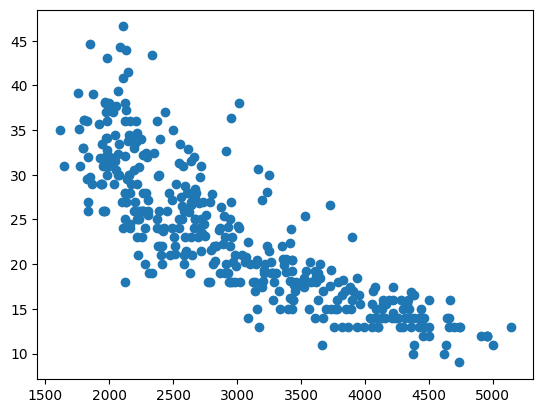

In [30]:
x_data = ndf.iloc[:,1:]
y_data = ndf.iloc[:,0]
y_data.columns=['mpg']
## 종속변수와 다른 변수간 산점도 확인
# ndf.plot(kind='scatter',x='weight',y='mpg')
plt.scatter(x=x_data['weight'],y=y_data)
plt.show()
plt.close()

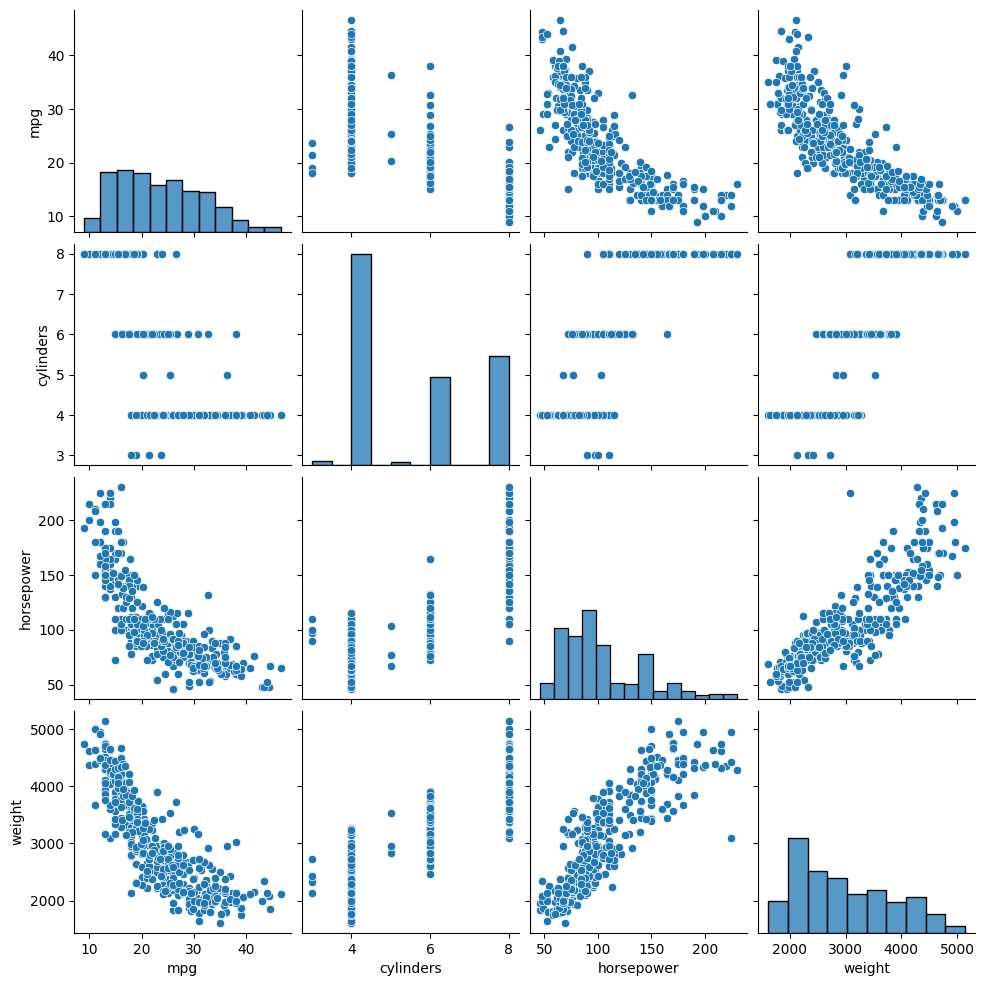

In [31]:
## 모든 변수에 대해 그래프
sns.pairplot(ndf)

In [35]:
## 독립변수 선택 
x_data
y_data.columns=['mpg']


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [38]:
## 훈련데이터 검증데이터 구분 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=10) ## 랜덤추출값, 무작위로 10번 섞음

print("train : ",len(x_train))
print("test : ",len(x_test))

train :  274
test :  118


In [44]:
## 회귀분석 실시 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

## 훈련용 데이터로 회귀모델에 학습시킨다
lr.fit(x_train,y_train)

## 학습시킨 모델을 바탕을 ㅗtest 데이터에 적용

r_square = lr.score(x_test,y_test)
print("r-square  :",r_square)

a = lr.coef_
print("기울기  :",a)

b= lr.intercept_
print("Y절편 : " ,b )


y_pred = lr.predict(x_data)
y_pred

r-square  : 0.6939048496695599
기울기  : [-0.60691288 -0.03714088 -0.00522268]
Y절편 :  46.414351269634025


array([18.43046954, 16.14345244, 18.04279395, 18.05846198, 18.34630798,
       11.53350791, 10.64851363, 11.05357053, 10.09199907, 14.39496987,
       16.63669615, 16.76786181, 16.3454236 , 17.08516489, 28.07012352,
       24.4486432 , 24.68249943, 26.10483083, 29.59399778, 32.69460494,
       26.8004472 , 27.95291262, 28.05445548, 28.12231715, 25.60054305,
        9.4710991 , 11.27643241, 10.87368749,  9.67714524, 29.59399778,
       28.81987716, 28.82218914, 25.30225169, 20.9122915 , 21.6724905 ,
       22.25919342, 21.88662029, 13.4485506 , 11.74535887, 14.1814885 ,
       14.59582648,  8.99531955, 10.4582681 ,  8.21482855, 23.21780447,
       28.73634746, 21.91795636, 23.11048993, 29.19823853, 29.55627476,
       30.55500367, 30.37916246, 32.31273417, 32.99979911, 32.17985523,
       31.17650235, 28.56105525, 29.91201557, 30.20917579, 28.06781153,
       29.16690246, 13.10907653, 12.15795043, 14.39214204, 14.31205545,
       16.81024194,  9.63707709, 12.2897148 , 12.34425356, 11.40

# 타이타닉 - 분류

In [72]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [74]:

## deck 은 열삭제
df= df.drop('deck',axis=1)




In [75]:
### age : 중위수로 대체
med_age = df['age'].median()
df['age']=df['age'].fillna(med_age,axis=0)

In [81]:
##  embarked 최빈값
mode_embarked = df['embarked'].mode()
df['embarked']=df['embarked'].fillna("S",axis=0)

##  embark_town 최빈값
mode_town = df['embark_town'].mode()
df['embark_town']=df['embark_town'].fillna("Southampton",axis=0)



In [82]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [83]:
new_df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
new_df

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


### 데이터 라벨링 ㄱㄱ


In [ ]:
ㅇ